In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm

cm = matplotlib.cm.get_cmap('inferno')
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': 'Palatino',
    'font.size': 11})

In [ ]:
with open('fenics_demonstration.pkl', 'rb') as f:
    omegas, norms = pickle.load(f) 

fig, ax = plt.subplots(1, 1, figsize=(5.55, 1.5))

ax.plot(omegas, norms, color='k')
ax.set_xlabel(r'Frequency $\omega$')
ax.set_ylabel(r'$||u(\omega)||_{L_2(\Omega)}$')
ax.set_xlim(np.min(omegas), np.max(omegas))
ax.set_yscale('log')
ax.grid(axis='y')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('fenics_demonstration.pgf', bbox_inches='tight')

In [ ]:
def plot_solution(ax, coords, solution, **kwargs):
    ax.margins(x=0, y=0)
    return ax.tripcolor(coords[:, 0], coords[:, 1], solution, shading='gouraud', **kwargs)

In [ ]:
with open('rectangular_cavity_mode1.pkl', 'rb') as f:
    solution1, coords1, omega1 = pickle.load(f) 

fig, ax = plt.subplots(1, 1, figsize=(5.55, 1.2), sharex=True, sharey=True)
plot = plot_solution(ax, coords1, np.real(solution1[0]), cmap=cm)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.colorbar(plot, orientation='vertical', aspect=10, pad=0.03)
plt.savefig('rectangular_cavity_mode1.pdf', bbox_inches='tight')
print(omega1)

with open('rectangular_cavity_mode5.pkl', 'rb') as f:
    solution2, coords2, omega2 = pickle.load(f)

fig, ax = plt.subplots(1, 1, figsize=(5.55, 1.2), sharex=True, sharey=True)
plot = plot_solution(ax, coords2, np.real(solution2[0]), cmap=cm)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.colorbar(plot, orientation='vertical', aspect=10, pad=0.03)
plt.savefig('rectangular_cavity_mode5.pdf', bbox_inches='tight')
print(omega2)

In [ ]:
with open('rectangular_cavity_norms.pkl', 'rb') as f:
    FE_norms, RI_norms, omegas = pickle.load(f) 

fig, ax = plt.subplots(2, 1, figsize=(5.55, 3.5), sharex=True)#, gridspec_kw={'height_ratios': [5, 5, 1]})

ax[0].set_ylabel(r'$||u_z(\omega)||_M$')
ax[0].plot(omegas, FE_norms, color=cm(0.0))

ax[1].set_ylabel(r'$||\tilde{u}_z(\omega)||_M$')
ax[1].plot(omegas, RI_norms, color=cm(0.5))

#ax[-1].scatter(nodes, np.zeros_like(nodes), s=10, color=cm(0.5))

#ax[-1].set_yticks([])
ax[-1].set_xlabel(r'Frequency $\omega$')
ax[-1].set_xlim(np.min(omegas), np.max(omegas))
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].grid(axis='y')
ax[1].grid(axis='y')
ax[0].set_ylim(2e-1, 2e+3)
ax[1].set_ylim(2e-1, 2e+3)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('rectangular_cavity_norms.pgf', bbox_inches='tight')

In [ ]:
with open('rectangular_cavity_errorprogression.pkl', 'rb') as f:
    norms, linspace, n_supp, n_iter, nodes, a, b = pickle.load(f)

fig, ax = plt.subplots(2, 1, figsize=(5.55, 4), sharex=True, gridspec_kw={'height_ratios': [10, 1]})

for i, S in enumerate(n_supp):
    ax[0].plot(linspace, np.real(norms[i]), label='S = {}'.format(S), color=cm(i/(len(n_supp))))
ax[1].scatter(nodes, np.zeros_like(nodes), s=10, c=cm(np.repeat(np.arange(len(n_supp)+1)/(len(n_supp)-1), 2)), zorder=-n_iter)
ax[0].set_ylabel(r'$||\tilde{u}_z^{(S)}(\omega) - u_z(\omega)||_M / ||\tilde{u}_z^{(S)}(\omega)||_M$')
ax[1].set_xlabel(r'Frequency $\omega$')
ax[1].set_xlim(a, b)
ax[1].set_yticks([])
ax[0].set_yscale('log')
ax[0].grid(axis='y')
ax[0].legend(loc='lower right')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('rectangular_cavity_errorprogression.pgf', bbox_inches='tight')

c:\Users\Fabio\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


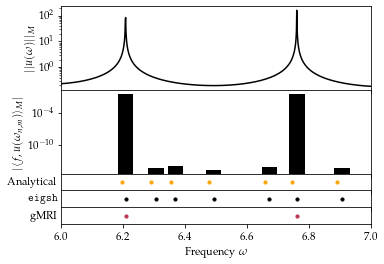

In [12]:
with open('rectangular_cavity_suppressed.pkl', 'rb') as f:
    omegas, norms, dotproducts, eigfreqs_analytical, eigfreqs_numerical, eigfreqs_rational = pickle.load(f)

fig, ax = plt.subplots(5, 1, figsize=(5.55, 4), sharex=True, gridspec_kw={'height_ratios': [5, 5, 1, 1, 1]})

a = 6
b = 7

ax[0].set_ylabel(r'$||u(\omega)||_M$')
ax[0].plot(omegas, norms, color='k')
ax[0].set_yscale('log')

ax[1].set_ylabel(r'$|\langle f , u(\omega_{n, m}) \rangle_M|$')
ax[1].bar(eigfreqs_numerical, dotproducts, width=0.05, color='k')
ax[1].set_yscale('log')

ax[2].set_ylabel('Analytical', rotation=0, ha='right', va='center')
ax[2].scatter(eigfreqs_analytical, np.zeros_like(eigfreqs_analytical), s=10, color=cm(0.8))
ax[2].set_yticks([])

ax[3].set_ylabel(r'\texttt{eigsh}', rotation=0, ha='right', va='center')
ax[3].scatter(eigfreqs_numerical, np.zeros_like(eigfreqs_numerical), s=10, color=cm(0.0))
ax[3].set_yticks([])

ax[4].set_ylabel('gMRI', rotation=0, ha='right', va='center')
ax[4].scatter(eigfreqs_rational, np.zeros_like(eigfreqs_rational), s=10, color=cm(0.5))
ax[4].set_yticks([])

ax[-1].set_xlabel(r'Frequency $\omega$')
ax[-1].set_xlim(a, b)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('rectangular_cavity_suppression.pgf', bbox_inches='tight')

In [ ]:
with open('imperfect_conductor_solution.pkl', 'rb') as f:
    solution1, coords1, omega1 = pickle.load(f) 

fig, ax = plt.subplots(1, 1, figsize=(5.55, 1.2), sharex=True, sharey=True)
plot = plot_solution(ax, coords1, np.real(solution1[0]), cmap=cm)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.colorbar(plot, orientation='vertical', aspect=10, pad=0.03)
plt.savefig('imperfect_conductor_solution.pdf', bbox_inches='tight')
print(omega1)

In [ ]:
with open('imperfect_conductor_norms.pkl', 'rb') as f:
    FE_norms, RI_norms, omegas, nodes = pickle.load(f) 

fig, ax = plt.subplots(3, 1, figsize=(5.55, 4), sharex=True, gridspec_kw={'height_ratios': [5, 5, 1]})

ax[0].set_ylabel(r'$||u(\omega)||_{L_2(\Omega)}$')
ax[0].plot(omegas, FE_norms, color=cm(0.0))

ax[1].set_ylabel(r'$||\tilde{u}(\omega)||_{L_2(\Omega)}$')
ax[1].plot(omegas, RI_norms, color=cm(0.5))

ax[-1].scatter(nodes, np.zeros_like(nodes), s=10, color=cm(0.5))

ax[-1].set_yticks([])
ax[-1].set_xlabel(r'Frequency $\omega$')
ax[-1].set_xlim(np.min(omegas), np.max(omegas))
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].grid(axis='y')
ax[1].grid(axis='y')
ax[0].set_ylim(3e-1, 5e+1)
ax[1].set_ylim(3e-1, 5e+1)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('imperfect_conductor_norms.pgf', bbox_inches='tight')

In [ ]:
with open('imperfect_conductor_eigfreqs.pkl', 'rb') as f:
    eigfreqs_list, imps = pickle.load(f)

fig, ax = plt.subplots(1, 3, figsize=(5.55, 1.7), sharex=True, sharey=True)

for i, imp in enumerate(imps):

    eigfreqs = eigfreqs_list[i]

    real = np.real(eigfreqs)
    imag = np.imag(eigfreqs)
    ax[i].grid()
    ax[i].scatter(real, imag, color='k', marker='x')
    ax[i].text(0.05, 0.05, r'$\lambda$ = {}'.format(imp), transform=ax[i].transAxes)
    ax[i].set_xlim(3, 5.5)
    ax[i].set_ylim(-0.2, 0.02)
    ax[i].axhline(0, color='k', linewidth=1.5, zorder=-1)

ax[0].set_ylabel(r'$\mathcal{I}(\omega)$')
ax[1].set_xlabel(r'$\mathcal{R}(\omega)$')

plt.subplots_adjust(wspace=0.1, hspace=0.0)
plt.savefig('imperfect_conductor_eigfreqs.pgf', bbox_inches='tight')

In [ ]:
def convert_to_dezibel(x):
    return 20*np.log(x / np.max(x))

In [ ]:
with open('circular_waveguide_scattering.pkl', 'rb') as f:
    freq, S11_FEM, S11_MRI, S12_FEM, S12_MRI = pickle.load(f)

fig, ax = plt.subplots(2, 1, figsize=(5.55, 4), sharex=True)

ax[0].plot(freq, convert_to_dezibel(S11_FEM), color=cm(0.0), label='reference')
ax[0].plot(freq, convert_to_dezibel(S11_MRI), color=cm(0.5), label='gMRI')

ax[1].plot(freq, convert_to_dezibel(S12_FEM), color=cm(0.0), label='reference')
ax[1].plot(freq, convert_to_dezibel(S12_MRI), color=cm(0.5), label='gMRI')

ax[0].set_ylabel(r'$S_{11}(\omega)$ (dB)')
ax[1].set_ylabel(r'$S_{12}(\omega)$ (dB)')
ax[-1].set_xlabel(r'Frequency $\omega$')
ax[-1].set_xlim(np.min(freq), np.max(freq))
ax[0].grid(axis='y')
ax[1].grid(axis='y')
ax[0].legend(loc='lower right')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('circular_waveguide_scattering.pgf', bbox_inches='tight')

In [ ]:
with open('circular_waveguide_error.pkl', 'rb') as f:
    linspace, error_S11, error_S12 = pickle.load(f)

fig, ax = plt.subplots(2, 1, figsize=(5.55, 6), sharex=True)

i = 0
for e_S11, e_S12 in zip(error_S11, error_S12):
    ax[0].plot(linspace[1:-1], e_S11[1:-1], color=cm(i/(len(error_S11))), label='S = {}'.format(i+2))
    ax[1].plot(linspace[1:-1], e_S12[1:-1], color=cm(i/(len(error_S11))))
    i += 1

ax[0].set_ylabel(r'$|S_{11, \textrm{gMRI}}(\omega) - S_{11, \textrm{FEM}}(\omega)|$')
ax[1].set_ylabel(r'$|S_{12, \textrm{gMRI}}(\omega) - S_{12, \textrm{FEM}}(\omega)|$')
ax[-1].set_xlabel(r'Frequency $\omega$')
ax[1].set_xlim(np.min(linspace[1:-1]), np.max(linspace[1:-1]))
ax[0].grid(axis='y')
ax[1].grid(axis='y')
ax[0].legend(ncol=3)
ax[0].set_yscale('log')
ax[1].set_yscale('log')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('circular_waveguide_error.pgf', bbox_inches='tight')